In [75]:
# requirements

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

import tensorflow
from tensorflow import keras

from keras.metrics import Precision,Recall,F1Score

In [3]:
df = pd.read_csv(r"C:\Users\saich\Downloads\Assessment - Form Responses.csv")
df.drop(columns=["Timestamp","Email Address"],axis=1,inplace=True)

In [4]:
df.head()

,How spontaneous are you?,Do you enjoy giving or receiving surprises?\n,\nHow important is music taste compatibility to you?\n,"How open are you to trying new things (food, travel, experiences)?",How much personal space do you need in a relationship?,How emotionally expressive are you?,How important is having similar long-term goals?,What’s your preferred mode of communication?,What’s your ideal time to hang out?,What is your ideal weekend plan?
0,Balanced,Like it,Slightly important,Mostly open,Quite a bit,Very expressive,Neutral,Face to Face,Late night,Partying
1,Balanced,Like it,Important but not a deal-breaker,Sometimes open,Moderate,Balanced,Important,Calling,Evening,Watching Movies
2,Mostly planned,Neutral,"Very important, must match mine",Sometimes open,A lot,Mostly expressive,Neutral,Texting,Evening,Staying Indoors/Chilling
3,Balanced,Love it,Neutral / Okay either way,Mostly open,Moderate,Balanced,Very important,Texting,Late night,Staying Indoors/Chilling
4,Balanced,Love it,Neutral / Okay either way,Very adventurous,Quite a bit,Balanced,Important,Calling,Evening,Watching Movies


In [5]:
# well have to create a ideal profile for giving the score
# based on the score youll have to create a column with match and no_match

In [6]:
# drawback of this data is every column in categorical format

In [19]:
# creating a ideal profile to calculate the score

data = {"How spontaneous are you?":"Balanced",
        "Do you enjoy giving or receiving surprises?\n":"Like it",
        "\nHow important is music taste compatibility to you?\n":"Important but not a deal-breaker",
        "How open are you to trying new things (food, travel, experiences)?":"Mostly open",
        "How much personal space do you need in a relationship?":"Quite a bit",
        "How emotionally expressive are you?":"Balanced",
        "How important is having similar long-term goals?":"Important",
        "What’s your preferred mode of communication?":"Face to Face",
        "What’s your ideal time to hang out?":"Late night",
        "What is your ideal weekend plan?":"Outdoor Adventures"}

In [16]:
for col in df.columns:
    print("===============================")
    print(df[col].value_counts())
    print("===============================")
    # df[col].value_counts().plot(kind='bar')
    # plt.show()

How spontaneous are you?
Balanced              78
Mostly planned        23
Mostly spontaneous    18
Very spontaneous      17
Very planned          13
Name: count, dtype: int64
Do you enjoy giving or receiving surprises?\n
Love it       51
Like it       50
Neutral       38
Dislike it     6
Hate it        4
Name: count, dtype: int64
\nHow important is music taste compatibility to you?\n
Very important, must match mine     49
Important but not a deal-breaker    43
Neutral / Okay either way           38
Slightly important                  13
Doesn’t matter at all                6
Name: count, dtype: int64
How open are you to trying new things (food, travel, experiences)?
Mostly open          62
Very adventurous     38
Sometimes open       32
Slightly hesitant    12
Not open at all       4
Name: count, dtype: int64
How much personal space do you need in a relationship?
Moderate       44
A little       33
Quite a bit    26
A lot          26
Very little    20
Name: count, dtype: int64
How emo

In [29]:
def custom_score(row):
    score = 0
    for key,value in data.items():
        observation = row.get(key)
        if observation == value:
            score +=1
    return score

In [30]:
df["score"] = df.apply(custom_score,axis=1)

In [31]:
df["score"].value_counts()

score
4    36
3    30
5    24
6    17
2    16
1    13
7     9
0     3
8     1
Name: count, dtype: int64

In [41]:
df.head()

,How spontaneous are you?,Do you enjoy giving or receiving surprises?\n,\nHow important is music taste compatibility to you?\n,"How open are you to trying new things (food, travel, experiences)?",How much personal space do you need in a relationship?,How emotionally expressive are you?,How important is having similar long-term goals?,What’s your preferred mode of communication?,What’s your ideal time to hang out?,What is your ideal weekend plan?,score,labels
0,Balanced,Like it,Slightly important,Mostly open,Quite a bit,Very expressive,Neutral,Face to Face,Late night,Partying,6,match
1,Balanced,Like it,Important but not a deal-breaker,Sometimes open,Moderate,Balanced,Important,Calling,Evening,Watching Movies,5,match
2,Mostly planned,Neutral,"Very important, must match mine",Sometimes open,A lot,Mostly expressive,Neutral,Texting,Evening,Staying Indoors/Chilling,0,no_match
3,Balanced,Love it,Neutral / Okay either way,Mostly open,Moderate,Balanced,Very important,Texting,Late night,Staying Indoors/Chilling,4,match
4,Balanced,Love it,Neutral / Okay either way,Very adventurous,Quite a bit,Balanced,Important,Calling,Evening,Watching Movies,4,match


In [38]:
df["labels"] = df["score"].apply(lambda x:"match" if x >=4 else "no_match")
# 4 is called as threshold

In [39]:
df["labels"].value_counts()

# imbalanced data
# rewrite the logic for creating labels
# upsample the data -- Experiments

labels
match       87
no_match    62
Name: count, dtype: int64

In [40]:
df

,How spontaneous are you?,Do you enjoy giving or receiving surprises?\n,\nHow important is music taste compatibility to you?\n,"How open are you to trying new things (food, travel, experiences)?",How much personal space do you need in a relationship?,How emotionally expressive are you?,How important is having similar long-term goals?,What’s your preferred mode of communication?,What’s your ideal time to hang out?,What is your ideal weekend plan?,score,labels
0,Balanced,Like it,Slightly important,Mostly open,Quite a bit,Very expressive,Neutral,Face to Face,Late night,Partying,6,match
1,Balanced,Like it,Important but not a deal-breaker,Sometimes open,Moderate,Balanced,Important,Calling,Evening,Watching Movies,5,match
2,Mostly planned,Neutral,"Very important, must match mine",Sometimes open,A lot,Mostly expressive,Neutral,Texting,Evening,Staying Indoors/Chilling,0,no_match
3,Balanced,Love it,Neutral / Okay either way,Mostly open,Moderate,Balanced,Very important,Texting,Late night,Staying Indoors/Chilling,4,match
4,Balanced,Love it,Neutral / Okay either way,Very adventurous,Quite a bit,Balanced,Important,Calling,Evening,Watching Movies,4,match
...,...,...,...,...,...,...,...,...,...,...,...,...
144,Very spontaneous,Love it,Important but not a deal-breaker,Very adventurous,Quite a bit,Very expressive,Very important,Face to Face,Late night,Staying Indoors/Chilling,4,match
145,Balanced,Like it,"Very important, must match mine",Mostly open,Moderate,Slightly reserved,Important,Face to Face,Evening,Staying Indoors/Chilling,5,match
146,Balanced,Like it,Neutral / Okay either way,Mostly open,Quite a bit,Mostly expressive,Important,Texting,Evening,Partying,5,match
147,Very planned,Love it,Neutral / Okay either way,Very adventurous,A little,Very reserved,Very important,Calling,Evening,Partying,0,no_match


In [43]:
# Convert the categorical columns --> numbers --> Encoding

# Type of Data - Nominal Data(doesnt follow any order), Ordinal data(follows order)


df.drop(columns="score",axis=1,inplace=True)

In [47]:
for col in df.columns:
    le = LabelEncoder()
    le = le.fit(df[col])
    df[col] = le.fit_transform(df[col])

In [48]:
df

,How spontaneous are you?,Do you enjoy giving or receiving surprises?\n,\nHow important is music taste compatibility to you?\n,"How open are you to trying new things (food, travel, experiences)?",How much personal space do you need in a relationship?,How emotionally expressive are you?,How important is having similar long-term goals?,What’s your preferred mode of communication?,What’s your ideal time to hang out?,What is your ideal weekend plan?,labels
0,0,2,3,0,3,3,1,1,2,1,0
1,0,2,1,3,2,0,0,0,1,3,0
2,1,4,4,3,1,1,1,2,1,2,1
3,0,3,2,0,2,0,4,2,2,2,0
4,0,3,2,4,3,0,0,0,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...
144,4,3,1,4,3,3,4,1,2,2,0
145,0,2,4,0,2,2,0,1,1,2,0
146,0,2,2,0,3,1,0,2,1,1,0
147,3,3,2,4,0,4,4,0,1,1,1


In [49]:
x = df.drop(columns = "labels",axis=1)
y = df["labels"]

In [51]:
x.shape

(149, 10)

In [68]:
requirements = keras.callbacks.ModelCheckpoint(
    r"C:\Users\saich\OneDrive\Desktop\elite_28_weights\weights.h5",
    monitor="val_loss",
    verbose=0,
    save_best_only=True,
    save_weights_only=False,
    mode="min",
    save_freq="epoch")

In [78]:
model = keras.Sequential()
model.add(keras.layers.Input(shape=(10,)))
model.add(keras.layers.Dense(8,
                             kernel_initializer=keras.initializers.GlorotNormal(seed=42),
                             ))
model.add(keras.layers.PReLU())
model.add(keras.layers.Dense(3,
                             kernel_initializer=keras.initializers.GlorotNormal(seed=42),
                            kernel_regularizer = keras.regularizers.L2()))
model.add(keras.layers.PReLU())
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(1,activation="sigmoid",
                            kernel_initializer=keras.initializers.HeNormal(seed=42)))

model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy",Precision(),Recall()])
history = model.fit(x,y,validation_split=0.2,batch_size=8,epochs=30,callbacks=[requirements])

Epoch 1/30
15/15 [==============================] - 2s 24ms/step - loss: 0.7355 - accuracy: 0.6555 - precision_2: 0.5738 - recall_1: 0.7000 - val_loss: 0.7298 - val_accuracy: 0.3667 - val_precision_2: 0.3793 - val_recall_1: 0.9167
Epoch 2/30
15/15 [==============================] - 0s 11ms/step - loss: 0.7299 - accuracy: 0.6050 - precision_2: 0.5306 - recall_1: 0.5200 - val_loss: 0.7251 - val_accuracy: 0.5333 - val_precision_2: 0.4545 - val_recall_1: 0.8333
Epoch 3/30
15/15 [==============================] - 0s 12ms/step - loss: 0.7187 - accuracy: 0.5882 - precision_2: 0.5098 - recall_1: 0.5200 - val_loss: 0.7198 - val_accuracy: 0.5667 - val_precision_2: 0.4737 - val_recall_1: 0.7500
Epoch 4/30
15/15 [==============================] - 0s 14ms/step - loss: 0.6797 - accuracy: 0.6639 - precision_2: 0.6042 - recall_1: 0.5800 - val_loss: 0.7155 - val_accuracy: 0.5667 - val_precision_2: 0.4667 - val_recall_1: 0.5833
Epoch 5/30
15/15 [==============================] - 0s 12ms/step - loss: 0.6

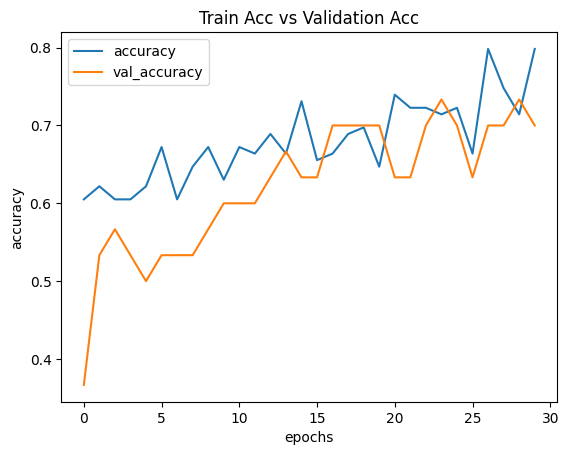

In [72]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Train Acc vs Validation Acc")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend(["accuracy","val_accuracy"])
plt.show()

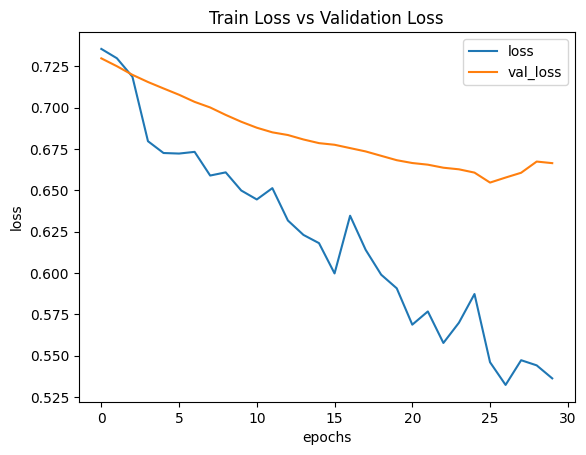

In [81]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Train Loss vs Validation Loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend(["loss","val_loss"])
plt.show()

In [79]:
model.save(r"C:\Users\saich\OneDrive\Desktop\elite_28_weights\weights.h5")

C:\Users\saich\anaconda3\envs\charan\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [80]:
model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_48 (Dense)            (None, 8)                 88        
                                                                 
 p_re_lu_28 (PReLU)          (None, 8)                 8         
                                                                 
 dense_49 (Dense)            (None, 3)                 27        
                                                                 
 p_re_lu_29 (PReLU)          (None, 3)                 3         
                                                                 
 batch_normalization_11 (Ba  (None, 3)                 12        
 tchNormalization)                                               
                                                                 
 dropout_10 (Dropout)        (None, 3)                 0         
                                                     